In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [351]:
## Importing the necessary libraries ##

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Data Preparing

In [290]:
## Loading the dataset ## 

df_train = pd.read_csv("telecom_customer_churn.csv")

In [291]:
## checking the data ##

df_train.head().T

,0,1,2,3,4
Customer ID,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
Gender,Female,Male,Male,Male,Female
Age,37,46,50,78,75
Married,Yes,No,No,Yes,Yes
Number of Dependents,0,0,0,0,0
City,Frazier Park,Glendale,Costa Mesa,Martinez,Camarillo
Zip Code,93225,91206,92627,94553,93010
Latitude,34.827662,34.162515,33.645672,38.014457,34.227846
Longitude,-118.999073,-118.203869,-117.922613,-122.115432,-119.079903
Number of Referrals,2,0,0,1,3


In [292]:
df_train.tail().T

,7038,7039,7040,7041,7042
Customer ID,9987-LUTYD,9992-RRAMN,9992-UJOEL,9993-LHIEB,9995-HOTOH
Gender,Female,Male,Male,Male,Male
Age,20,40,22,21,36
Married,No,Yes,No,Yes,Yes
Number of Dependents,0,0,0,0,0
City,La Mesa,Riverbank,Elk,Solana Beach,Sierra City
Zip Code,91941,95367,95432,92075,96125
Latitude,32.759327,37.734971,39.108252,33.001813,39.600599
Longitude,-116.99726,-120.954271,-123.645121,-117.263628,-120.636358
Number of Referrals,0,1,0,5,1


In [293]:
## Display the summary statistics of the data ## 

df_train.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [294]:
## checking what type of data avail in dataset ###

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [295]:
## identifying the no.of rows and columns ##

df_train.shape

(7043, 38)

In [296]:
## finding the null values in the data ##

df_train.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [297]:
nulls = df_train.isnull().mean()*100
print(nulls)

Customer ID                           0.000000
Gender                                0.000000
Age                                   0.000000
Married                               0.000000
Number of Dependents                  0.000000
City                                  0.000000
Zip Code                              0.000000
Latitude                              0.000000
Longitude                             0.000000
Number of Referrals                   0.000000
Tenure in Months                      0.000000
Offer                                55.047565
Phone Service                         0.000000
Avg Monthly Long Distance Charges     9.683374
Multiple Lines                        9.683374
Internet Service                      0.000000
Internet Type                        21.666903
Avg Monthly GB Download              21.666903
Online Security                      21.666903
Online Backup                        21.666903
Device Protection Plan               21.666903
Premium Tech 

In [298]:
df_train.columns


Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [299]:
## Dropping the columns that contains null value percentage more than 60 and not usefull info ##

for i in df_train.columns:
    if nulls[i] > 70:
        df_train.drop(i, axis=1, inplace=True)
df_train.head().T


,0,1,2,3,4
Customer ID,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
Gender,Female,Male,Male,Male,Female
Age,37,46,50,78,75
Married,Yes,No,No,Yes,Yes
Number of Dependents,0,0,0,0,0
City,Frazier Park,Glendale,Costa Mesa,Martinez,Camarillo
Zip Code,93225,91206,92627,94553,93010
Latitude,34.827662,34.162515,33.645672,38.014457,34.227846
Longitude,-118.999073,-118.203869,-117.922613,-122.115432,-119.079903
Number of Referrals,2,0,0,1,3


In [300]:
## dropping the columns which not having usefull info
cols = ['Customer ID','City']
df_train1 = df_train.drop(columns = cols)

In [301]:
## checking the unique values in the data ##

df_train1.nunique()

Gender                                  2
Age                                    62
Married                                 2
Number of Dependents                   10
Zip Code                             1626
Latitude                             1626
Longitude                            1625
Number of Referrals                    12
Tenure in Months                       72
Offer                                   5
Phone Service                           2
Avg Monthly Long Distance Charges    3583
Multiple Lines                          2
Internet Service                        2
Internet Type                           3
Avg Monthly GB Download                49
Online Security                         2
Online Backup                           2
Device Protection Plan                  2
Premium Tech Support                    2
Streaming TV                            2
Streaming Movies                        2
Streaming Music                         2
Unlimited Data                    

In [302]:
## finding the value counts in each and column ##

for i in df_train1.columns:
    print("<------->"*5)
    print(i)
    print(df_train1[i].value_counts())
    print("<------->"*5)

<-------><-------><-------><-------><------->
Gender
Gender
Male      3555
Female    3488
Name: count, dtype: int64
<-------><-------><-------><-------><------->
<-------><-------><-------><-------><------->
Age
Age
42    156
47    153
40    150
44    148
23    146
     ... 
80     66
78     63
66     63
67     61
72     58
Name: count, Length: 62, dtype: int64
<-------><-------><-------><-------><------->
<-------><-------><-------><-------><------->
Married
Married
No     3641
Yes    3402
Name: count, dtype: int64
<-------><-------><-------><-------><------->
<-------><-------><-------><-------><------->
Number of Dependents
Number of Dependents
0    5416
1     553
2     531
3     517
5      10
4       9
6       3
7       2
9       1
8       1
Name: count, dtype: int64
<-------><-------><-------><-------><------->
<-------><-------><-------><-------><------->
Zip Code
Zip Code
92028    43
92027    38
92122    36
92117    34
92126    32
         ..
93528     2
92105     2
96150     2


## Visualizations of the data

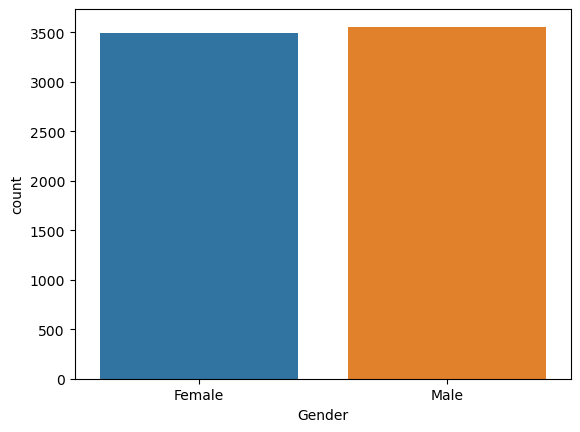

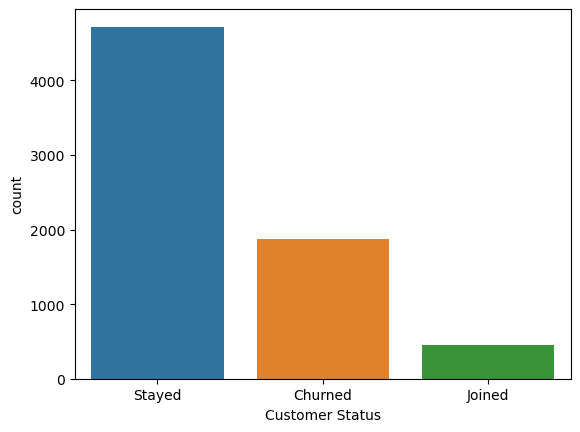

In [303]:

# Count plot for a categorical feature
sns.countplot(x='Gender', data=df_train1)
plt.show()

sns.countplot(x='Customer Status', data=df_train)
plt.show()

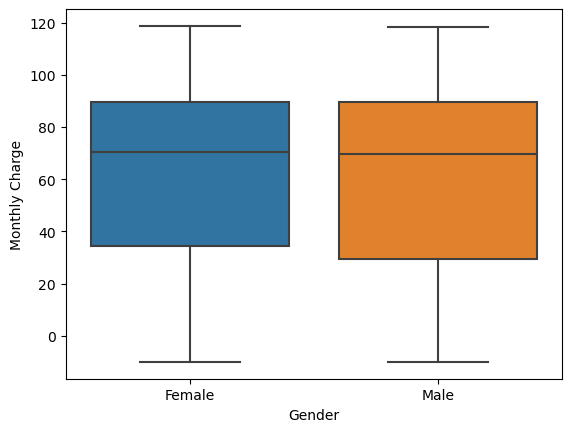

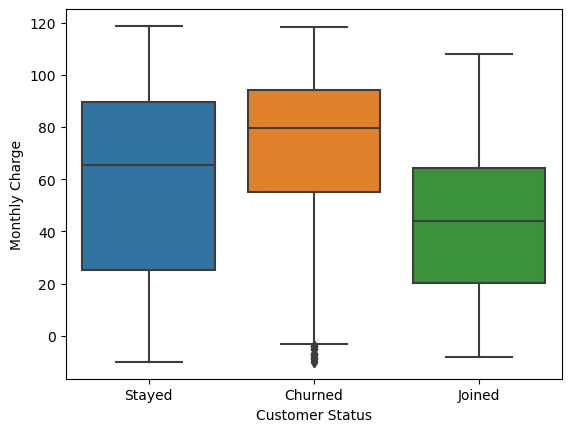

In [304]:
# Box plot for MonthlyCharges by gender
sns.boxplot(x='Gender', y='Monthly Charge', data=df_train1)
plt.show()

# Box plot for MonthlyCharges by Churn
sns.boxplot(x='Customer Status', y='Monthly Charge', data=df_train1)
plt.show()

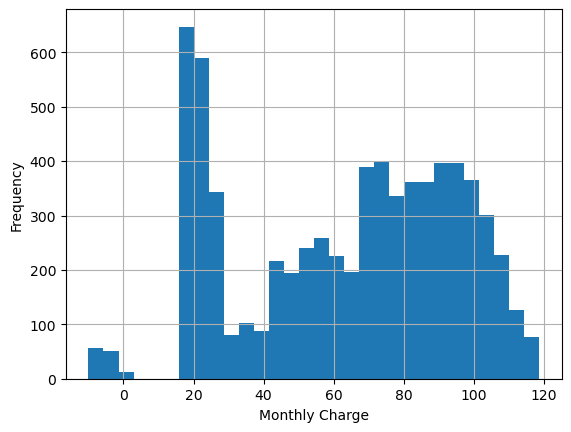

In [305]:
# Histogram for a numerical feature
df_train1['Monthly Charge'].hist(bins=30)
plt.xlabel('Monthly Charge')
plt.ylabel('Frequency')
plt.show()

C:\Users\chenna.chaithanya\AppData\Local\Temp\ipykernel_6472\3705575182.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_total_charges_by_age_group = df_train1.groupby('AgeGroup')['Total Charges'].mean()


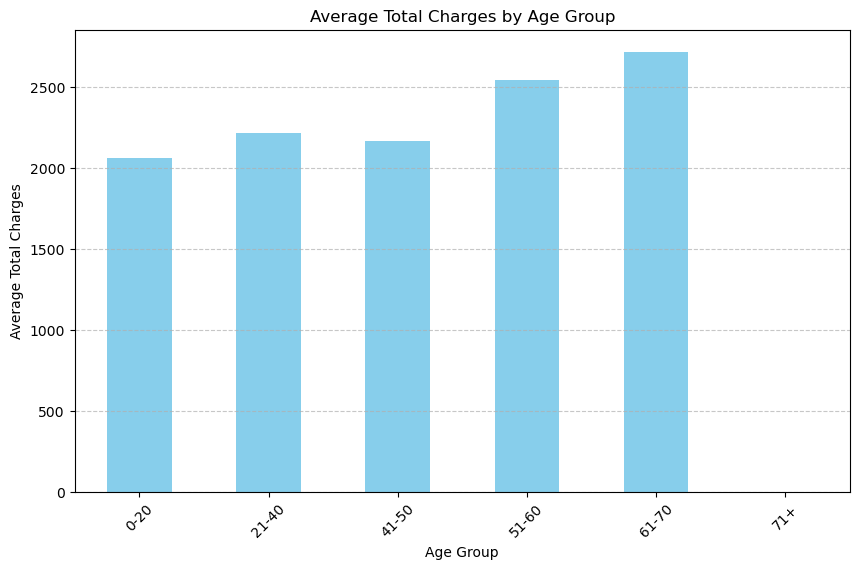

In [306]:
## Which age group people are using the more internet .. 

# Define age groups
bins = [0, 20, 40, 60, 80, 100, 120]
labels = ['0-20','21-40', '41-50', '51-60', '61-70', '71+']
df_train1['AgeGroup'] = pd.cut(df_train1['Age'], bins=bins, labels=labels, right=False)

# Calculate average total charges for each age group
avg_total_charges_by_age_group = df_train1.groupby('AgeGroup')['Total Charges'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
avg_total_charges_by_age_group.plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Average Total Charges')
plt.title('Average Total Charges by Age Group')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\chenna.chaithanya\AppData\Local\Temp\ipykernel_6472\2502051999.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contract_counts_by_age_group = df_train1.groupby(['AgeGroup', 'Contract']).size().unstack(fill_value=0)


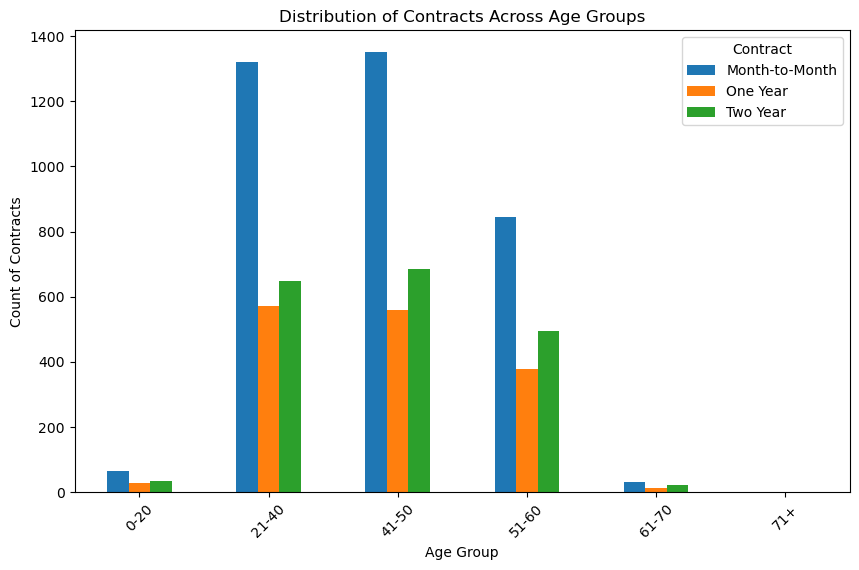

In [307]:
## which age group guys are taking which type of plan

# Count contracts by age group
contract_counts_by_age_group = df_train1.groupby(['AgeGroup', 'Contract']).size().unstack(fill_value=0)

# Plot the results
contract_counts_by_age_group.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Age Group')
plt.ylabel('Count of Contracts')
plt.title('Distribution of Contracts Across Age Groups')
plt.xticks(rotation=45)
plt.legend(title='Contract')
plt.show()

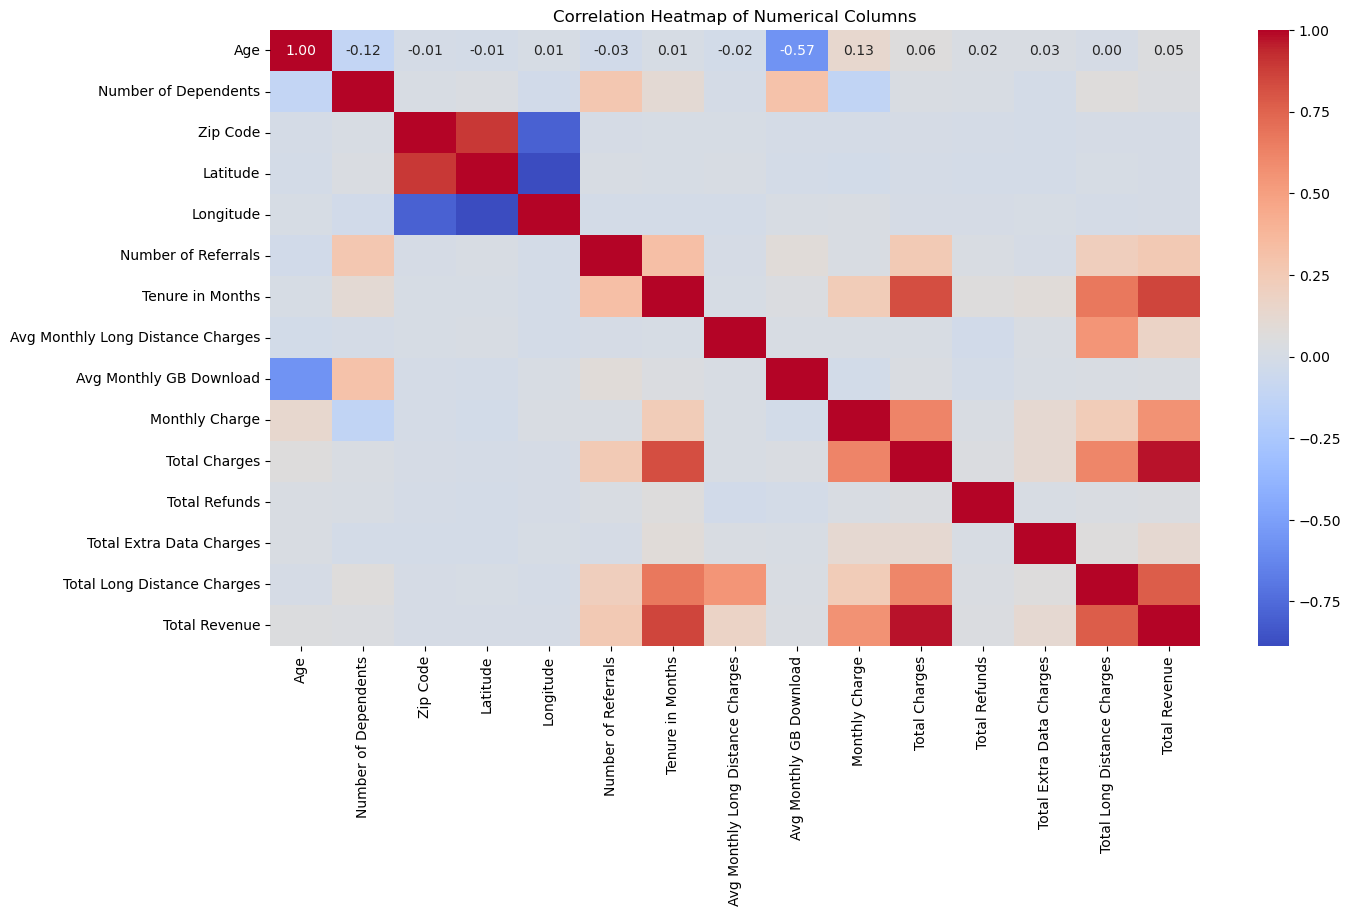

In [308]:
## finding the correlation between the numerical variables

numerical_df = df_train1.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [309]:
# Separate categorical columns
categorical_columns = df_train1.select_dtypes(include=['object']).columns

# Print the list of categorical columns
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['Gender', 'Married', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Customer Status'],
      dtype='object')


In [310]:
## handling the categorical data 
# converting the cat cols into num cols 

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Iterate through each column and apply LabelEncoder if it's categorical

for column in df_train1.columns:
    if df_train1[column].dtype == 'object':
        df_train1[column] = le.fit_transform(df_train1[column])

# Display the dataframe
df_train1.head().T

,0,1,2,3,4
Gender,0,1,1,1,0
Age,37,46,50,78,75
Married,1,0,0,1,1
Number of Dependents,0,0,0,0,0
Zip Code,93225,91206,92627,94553,93010
Latitude,34.827662,34.162515,33.645672,38.014457,34.227846
Longitude,-118.999073,-118.203869,-117.922613,-122.115432,-119.079903
Number of Referrals,2,0,0,1,3
Tenure in Months,9,9,4,13,3
Offer,5,5,4,3,5


In [311]:
df_train2 = df_train1.drop(['AgeGroup'], axis=1)

## Model building

In [312]:
# Split the data into features and target

X = df_train2.drop('Customer Status', axis=1)
y = df_train2['Customer Status']


In [313]:
# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [314]:
# Feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [315]:
## dimensions of the data after splitting

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (5634, 33)
y_train shape: (5634,)


In [316]:
print("Data types of X_train:")
print(X_train.dtype)

Data types of X_train:
float64


In [317]:
# Check for NaN or Infinite Values in X_train

print("NaN values in X_train:", np.isnan(X_train).sum())
print("Infinite values in X_train:", np.isinf(X_train).sum())

# Check for NaN or Infinite Values in y_train

print("NaN values in y_train:", np.isnan(y_train).sum())
print("Infinite values in y_train:", np.isinf(y_train).sum())

NaN values in X_train: 1768
Infinite values in X_train: 0
NaN values in y_train: 0
Infinite values in y_train: 0


In [318]:
# Create an instance of SimpleImputer with strategy='mean'

imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_train and transform X_train

X_train_imputed = imputer.fit_transform(X_train)

# Check if there are any NaN values after imputation

print("NaN values in X_train after imputation:", np.isnan(X_train_imputed).sum())

NaN values in X_train after imputation: 0


In [319]:
## findig the value counts

print("Class distribution in y_train:")
print(y_train.value_counts())

Class distribution in y_train:
Customer Status
2    3781
0    1496
1     357
Name: count, dtype: int64


In [320]:
null_values = np.isnan(X_train_imputed).sum()

# Print the count of null values

print("Null values in X_train_imputed:", null_values)

Null values in X_train_imputed: 0


In [321]:
## Random Forest model

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_imputed, y_train)

RandomForestClassifier(random_state=42)

In [322]:
## finding the dimension of the data

print("Shape of X_test:", X_test.shape)

Shape of X_test: (1409, 33)


In [323]:
## identifying the nan values

print("NaN values in X_test:", np.isnan(X_test).sum())
print("Infinite values in X_test:", np.isinf(X_test).sum())

NaN values in X_test: 440
Infinite values in X_test: 0


In [324]:
# Create an instance of SimpleImputer with strategy='mean'

imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_train and transform X_test

X_test_imputed = imputer.fit_transform(X_test)

# Check if there are any NaN values after imputation

print("NaN values in X_test after imputation:", np.isnan(X_test_imputed).sum())

NaN values in X_test after imputation: 0


In [325]:

y_pred = rf_model.predict(X_test_imputed)

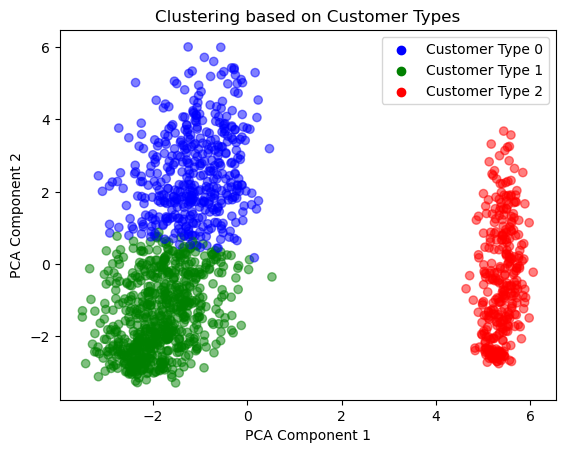

In [327]:
# Assign colors to clusters representing different customer types
cluster_colors = {0: 'blue', 1: 'green', 2: 'red'}

# Plot the clusters with assigned colors
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=[cluster_colors[cluster] for cluster in clusters], alpha=0.5)

# Add legend
for cluster, color in cluster_colors.items():
    plt.scatter([], [], c=color, label=f'Customer Type {cluster}')

plt.legend()
plt.title('Clustering based on Customer Types')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## Cluster 0 (High-Spending Customers): Blue
## Cluster 1 (Low-Churn Customers): Green
## Cluster 2 (Engaged Customers): Red

## Calculating the Evaluation metrics

In [353]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')
f1_micro = f1_score(y_test, y_pred, average='micro')

precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

In [354]:
# Print evaluation metrics
print("Micro-average Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision_micro)
print("Recall:", recall_micro)
print("F1-Score:", f1_micro)

print("\nMacro-average Metrics:")
print("Precision:", precision_macro)
print("Recall:", recall_macro)
print("F1-Score:", f1_macro)

Micro-average Metrics:
Accuracy: 0.8388928317955997
Precision: 0.8388928317955997
Recall: 0.8388928317955997
F1-Score: 0.8388928317955997

Macro-average Metrics:
Precision: 0.7721536015441388
Recall: 0.7267591431817921
F1-Score: 0.7461579908011776


In [355]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

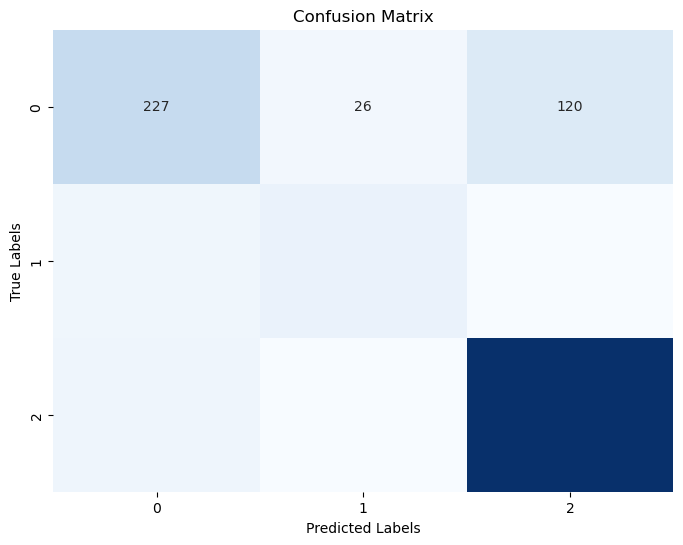

In [356]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Deployment script for the model

In [331]:
from flask import Flask, request, jsonify
import pickle
import os

In [341]:
# save the model

with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [342]:
# Create a Flask app
app = Flask(__name__)

# Load the trained model
model_file_path = 'model.pkl'  # Adjust the path if necessary
with open(model_file_path, 'rb') as f:
    model = pickle.load(f)


In [343]:
@app.route('/')
def home():
    return 'Customer Churn Prediction Service'


In [345]:
# Define a route for making predictions
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get input data from request
        data = request.get_json()
        features = np.array(data['features'])  # Assuming features are passed as JSON array

        # Make predictions
        predictions = model.predict(features)

        # Convert predictions to JSON format
        response = {'predictions': predictions.tolist()}
        return jsonify(response)

    except Exception as e:
        return jsonify({'error': str(e)})

In [346]:
if __name__ == '__main__':
    # Run the Flask app
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\chenna.chaithanya\AppData\Local\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [347]:
pip install flask

Note: you may need to restart the kernel to use updated packages.
